# Objective :  Predict Restaurant Ratings
# Regression

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.
- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.

- Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.

- Interpret the model's results and analyze the most influential features affecting restaurant ratings.

# 1. Load Python Modules

In [1]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2. Read the Dataset from csv/excel file  - Using Pandas
 - Excel
 - csv
 - url

In [2]:
file_path=r"Dataset .csv"
df=pd.read_csv(file_path)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
#drop - sensitive - non imp columns
print(df["Restaurant ID"].nunique())
df.drop("Restaurant ID",axis=1,inplace=True)

9551


# 3. Basic Inspection on given dataset
- Head , tail , sample
- Shape , len , size
- dtypes , columns , info
- isnull().sum() , isna().sum()

In [5]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(df)

top 5 rows - using head
          Restaurant Name  Country Code              City  \
0        Le Petit Souffle           162       Makati City   
1        Izakaya Kikufuji           162       Makati City   
2  Heat - Edsa Shangri-La           162  Mandaluyong City   
3                    Ooma           162  Mandaluyong City   
4             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas

### 3.1 Non-Significant columns - we need to drop here.
 - we can not find any insights from them


# 4. Handling Missing Values - Cat - Variables
 - Replace with Mode - One of the Method

In [6]:
# No Missing Values - I am skipping this section
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 5. Categorical- UniVariable - Analysis -Using Pipeline
   - Frequency Table 
   - Bar Graph
   - Pie Graph

In [7]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()         
        

In [10]:
df.select_dtypes(include='object').columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

Currency frequency table
+----+------------------------+-----------+
|    |         Class          | Frequency |
+----+------------------------+-----------+
| 0  |   Indian Rupees(Rs.)   |   8652    |
| 1  |       Dollar($)        |    482    |
| 2  |       Pounds(��)       |    80     |
| 3  |   Brazilian Real(R$)   |    60     |
| 4  |   Emirati Diram(AED)   |    60     |
| 5  |        Rand(R)         |    60     |
| 6  |     NewZealand($)      |    40     |
| 7  |    Turkish Lira(TL)    |    34     |
| 8  |    Botswana Pula(P)    |    22     |
| 9  | Indonesian Rupiah(IDR) |    21     |
| 10 |    Qatari Rial(QR)     |    20     |
| 11 | Sri Lankan Rupee(LKR)  |    20     |
+----+------------------------+-----------+
Currency Relative frequency table
+----+------------------------+-----------+----------------------+
|    |         Class          | Frequency | Relative Frequency % |
+----+------------------------+-----------+----------------------+
| 0  |   Indian Rupees(Rs.)   |   86

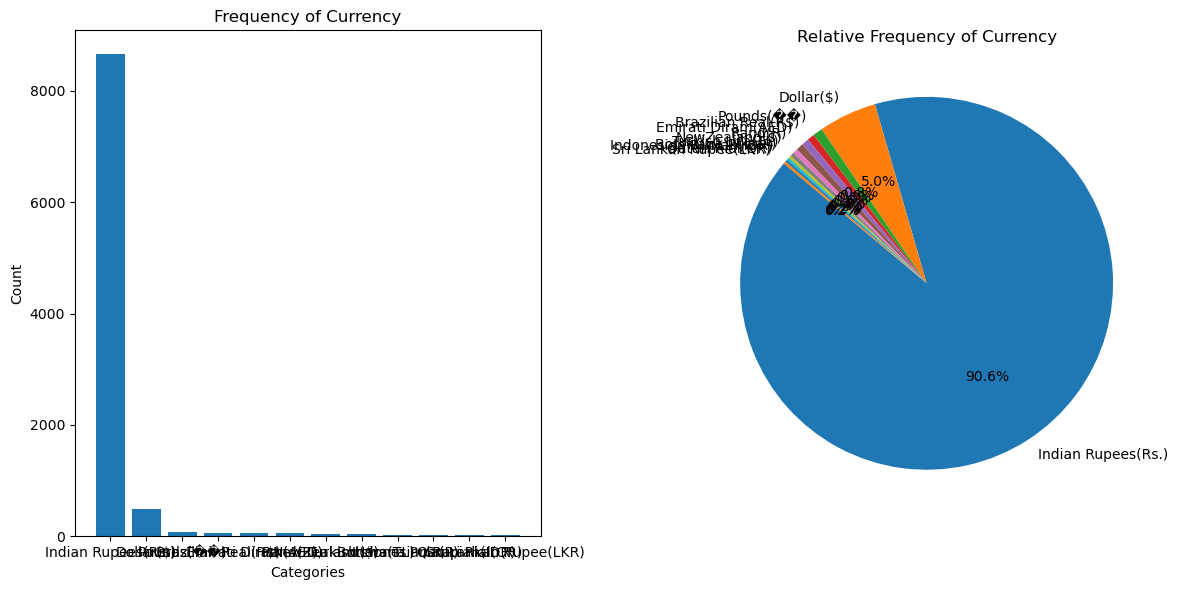

Has Table booking frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   8393    |
| 1 |  Yes  |   1158    |
+---+-------+-----------+
Has Table booking Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   8393    |        87.88         |
| 1 |  Yes  |   1158    |        12.12         |
+---+-------+-----------+----------------------+


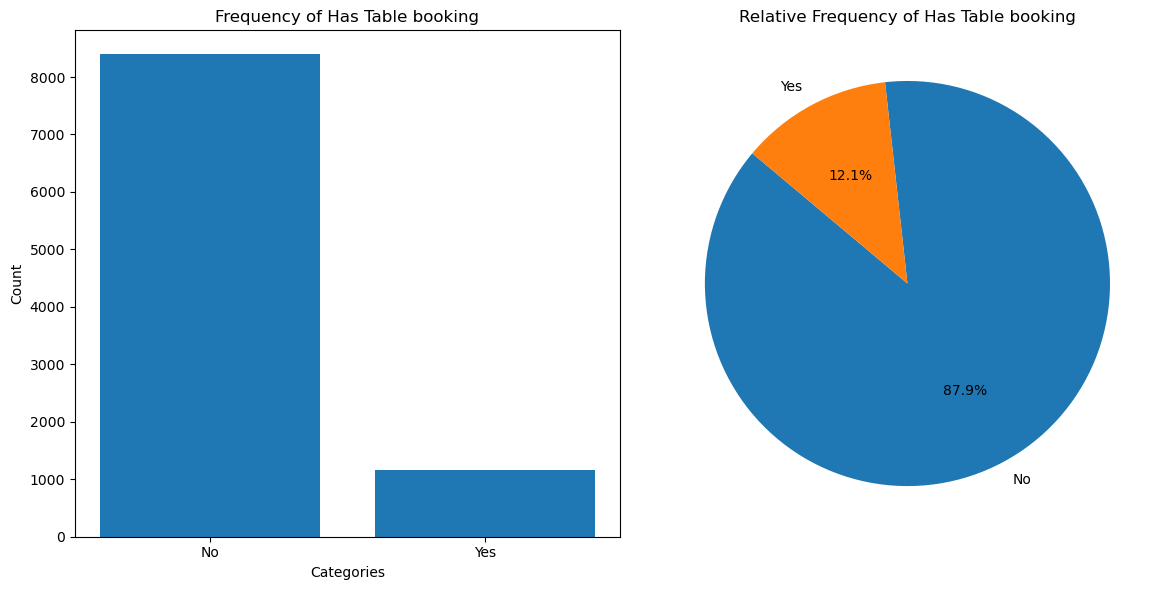

Has Online delivery frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   7100    |
| 1 |  Yes  |   2451    |
+---+-------+-----------+
Has Online delivery Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   7100    |        74.34         |
| 1 |  Yes  |   2451    |        25.66         |
+---+-------+-----------+----------------------+


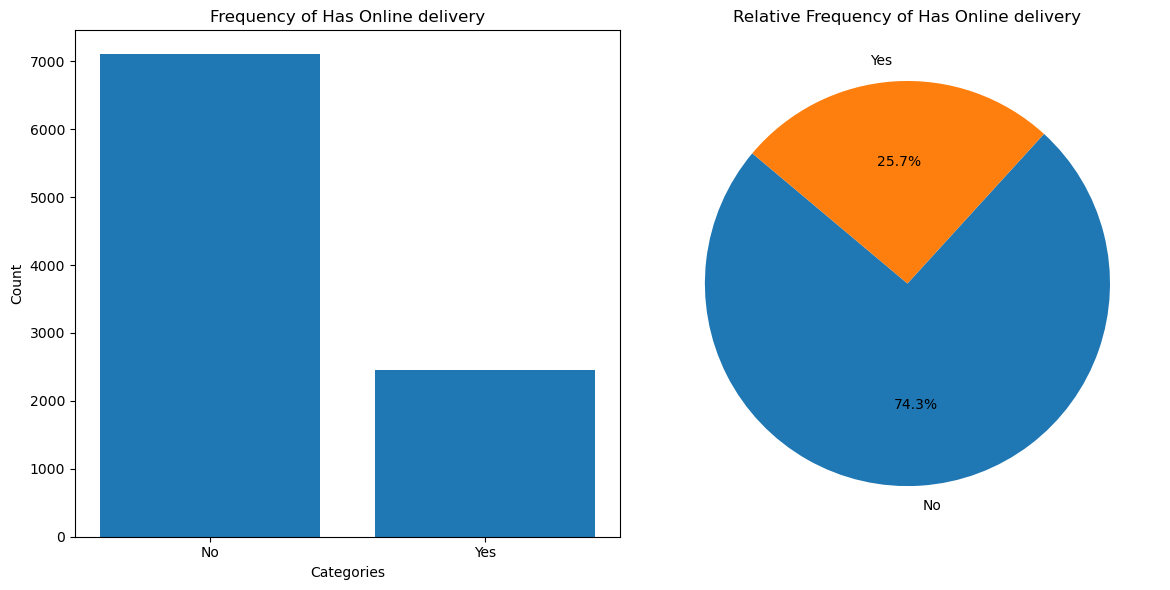

Is delivering now frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   9517    |
| 1 |  Yes  |    34     |
+---+-------+-----------+
Is delivering now Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   9517    |        99.64         |
| 1 |  Yes  |    34     |         0.36         |
+---+-------+-----------+----------------------+


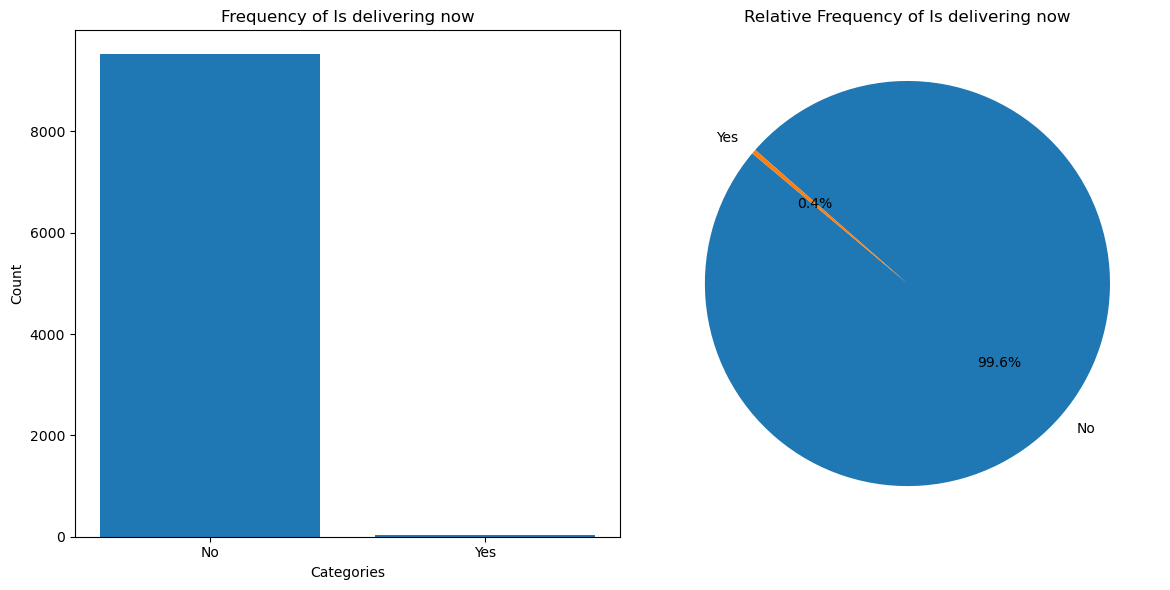

Switch to order menu frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   9551    |
+---+-------+-----------+
Switch to order menu Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   9551    |        100.0         |
+---+-------+-----------+----------------------+


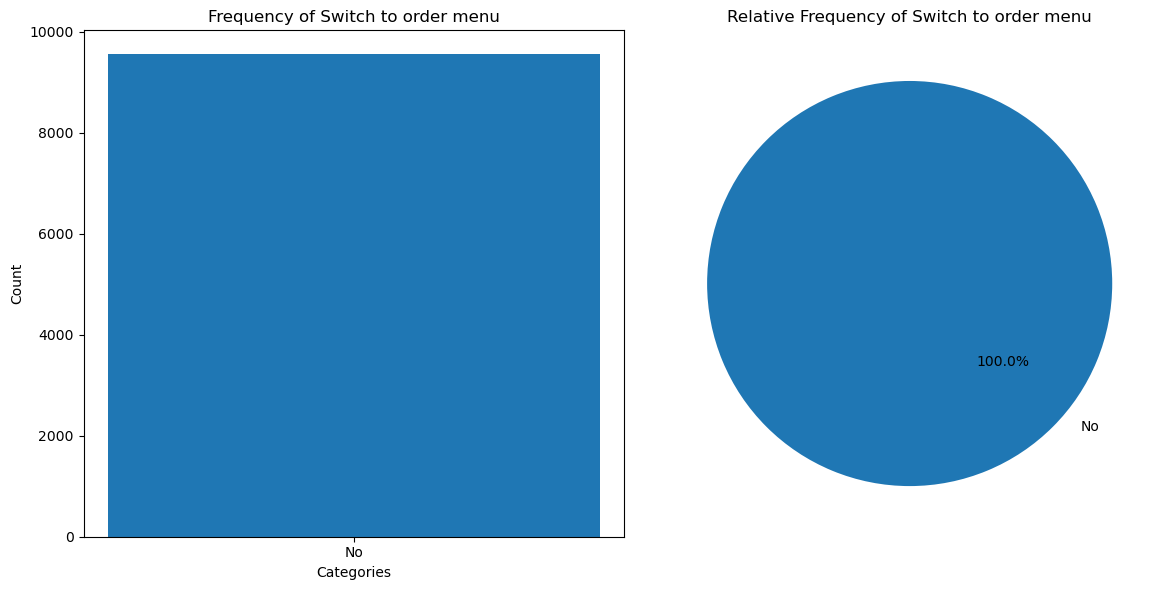

Rating color frequency table
+---+------------+-----------+
|   |   Class    | Frequency |
+---+------------+-----------+
| 0 |   Orange   |   3737    |
| 1 |   White    |   2148    |
| 2 |   Yellow   |   2100    |
| 3 |   Green    |   1079    |
| 4 | Dark Green |    301    |
| 5 |    Red     |    186    |
+---+------------+-----------+
Rating color Relative frequency table
+---+------------+-----------+----------------------+
|   |   Class    | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |   Orange   |   3737    |        39.13         |
| 1 |   White    |   2148    |        22.49         |
| 2 |   Yellow   |   2100    |        21.99         |
| 3 |   Green    |   1079    |         11.3         |
| 4 | Dark Green |    301    |         3.15         |
| 5 |    Red     |    186    |         1.95         |
+---+------------+-----------+----------------------+


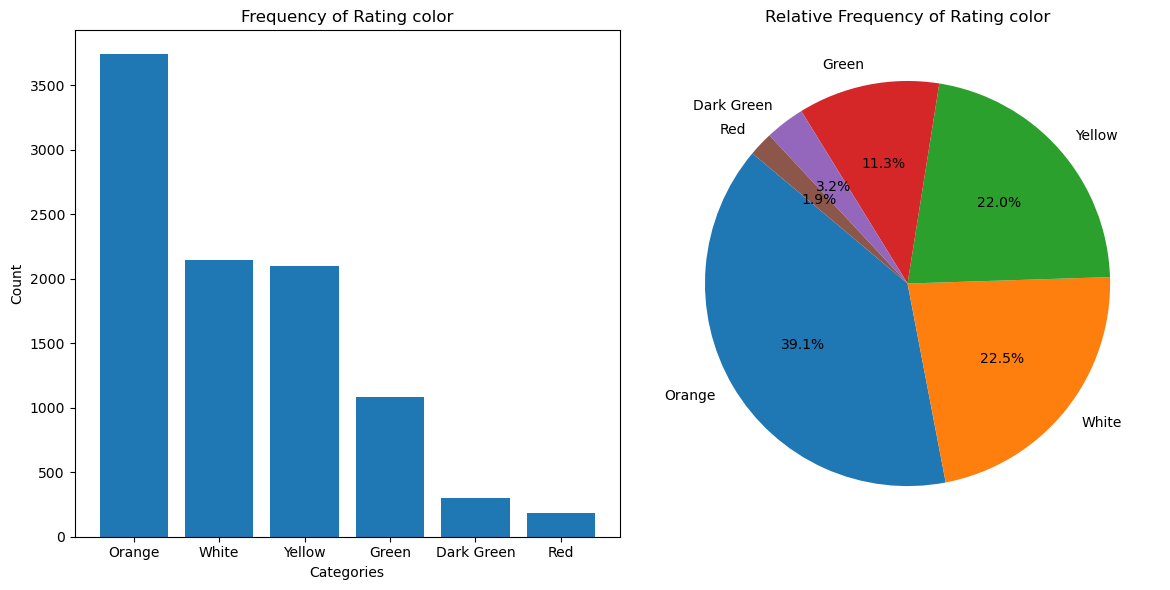

Rating text frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 |  Average  |   3737    |
| 1 | Not rated |   2148    |
| 2 |   Good    |   2100    |
| 3 | Very Good |   1079    |
| 4 | Excellent |    301    |
| 5 |   Poor    |    186    |
+---+-----------+-----------+
Rating text Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 |  Average  |   3737    |        39.13         |
| 1 | Not rated |   2148    |        22.49         |
| 2 |   Good    |   2100    |        21.99         |
| 3 | Very Good |   1079    |         11.3         |
| 4 | Excellent |    301    |         3.15         |
| 5 |   Poor    |    186    |         1.95         |
+---+-----------+-----------+----------------------+


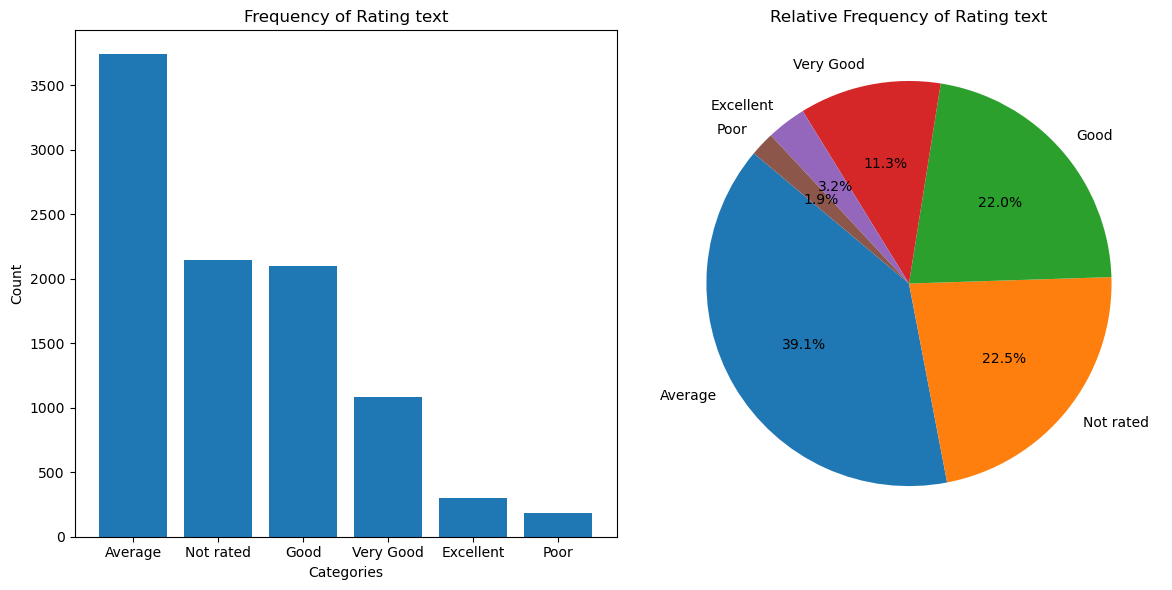

In [12]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

cat_df = df[[ 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cat_df)

# 6. Handling Missing Values in Numerical Columns
- Replace with Median - One of the Method

# 7. Numerical - UniVariable - Analysis - Using -Pipeline
- Frequency Interval - Data Distribution Table
- Histogram Graph
- Hist with KDE Graph
- Box Plots

In [13]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            
        
        

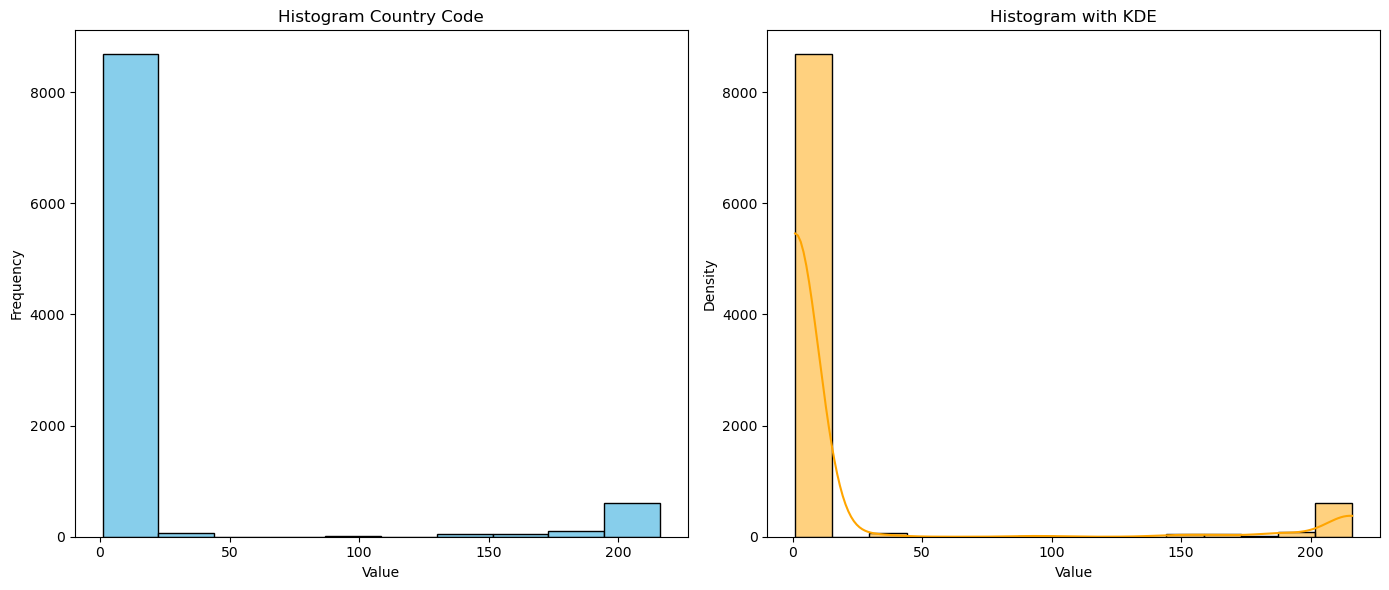

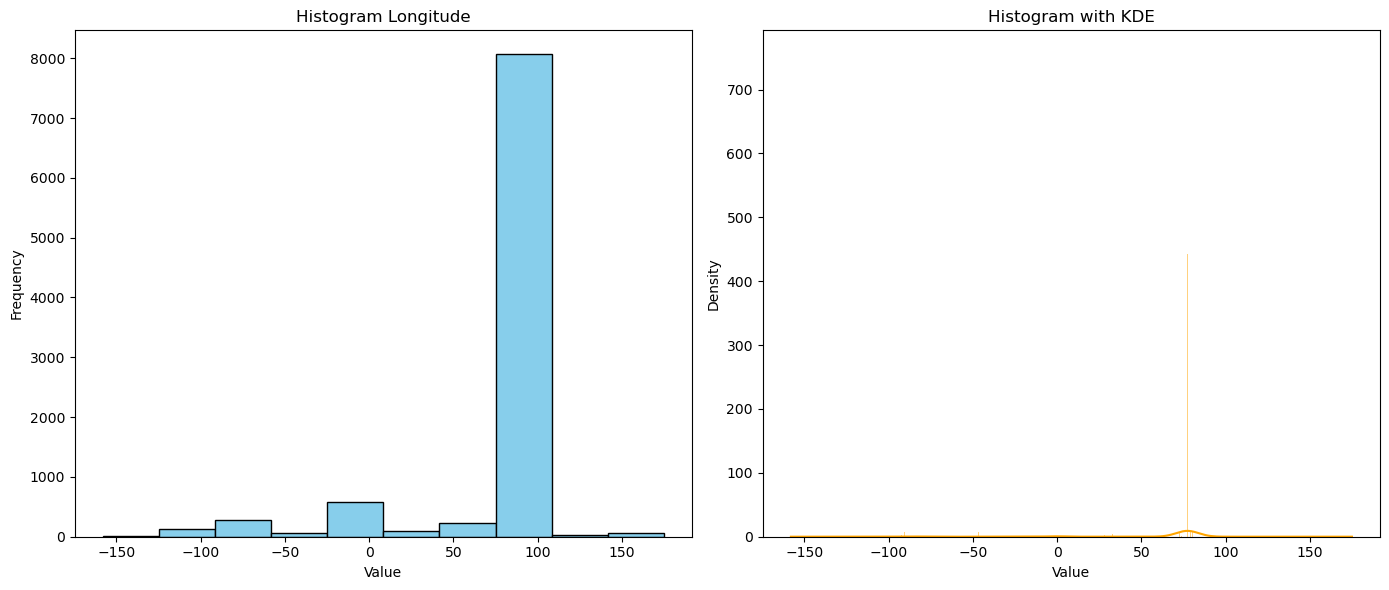

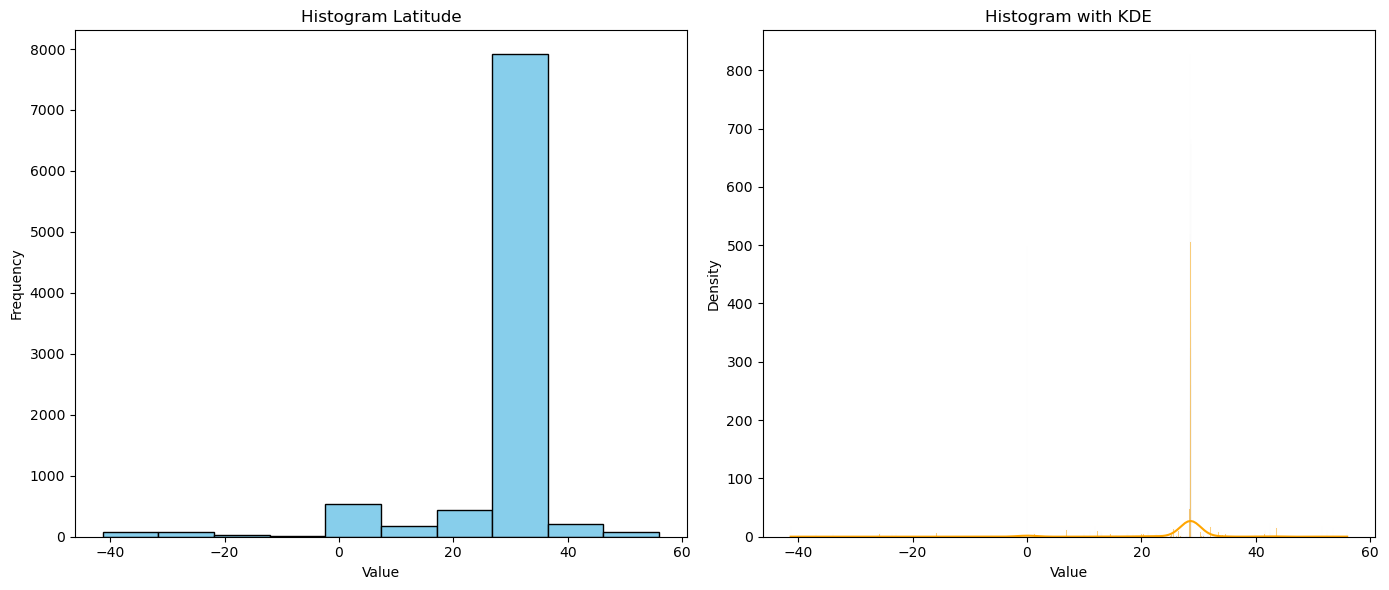

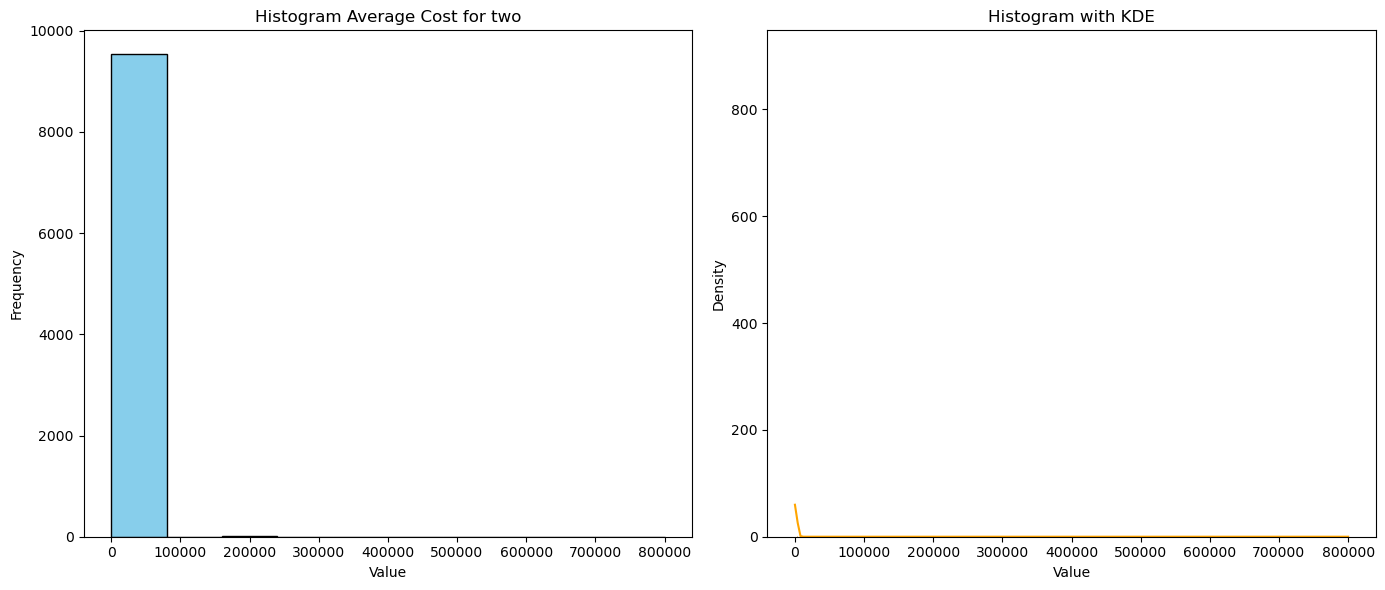

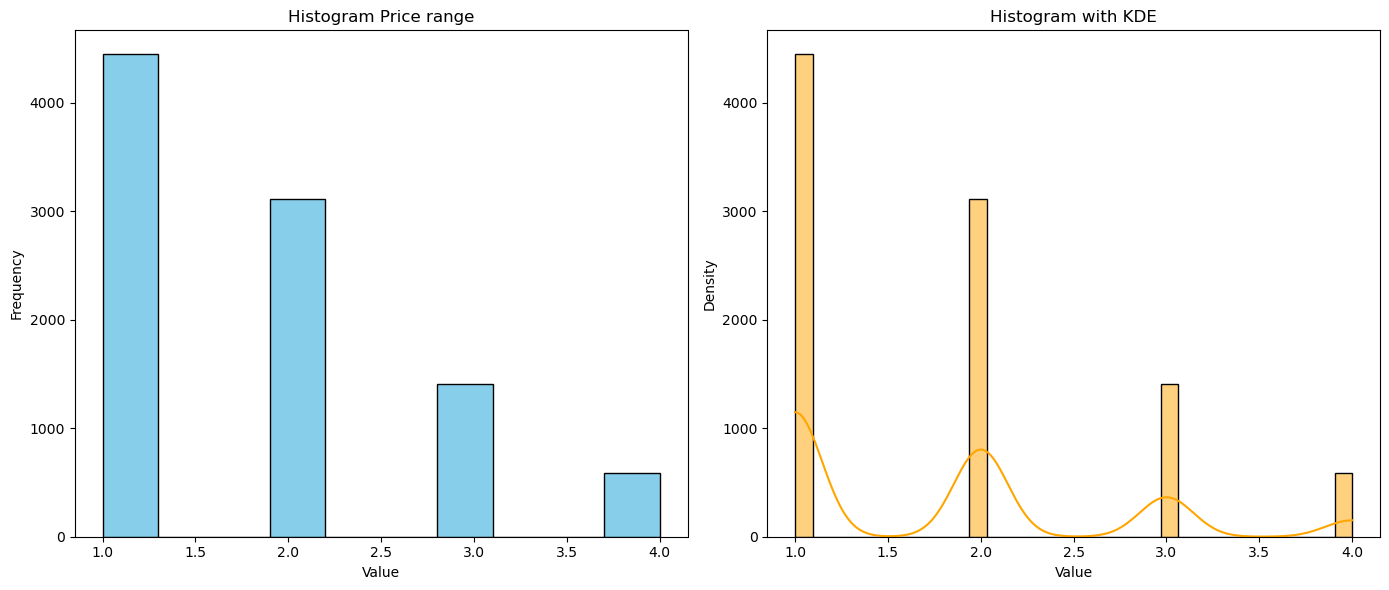

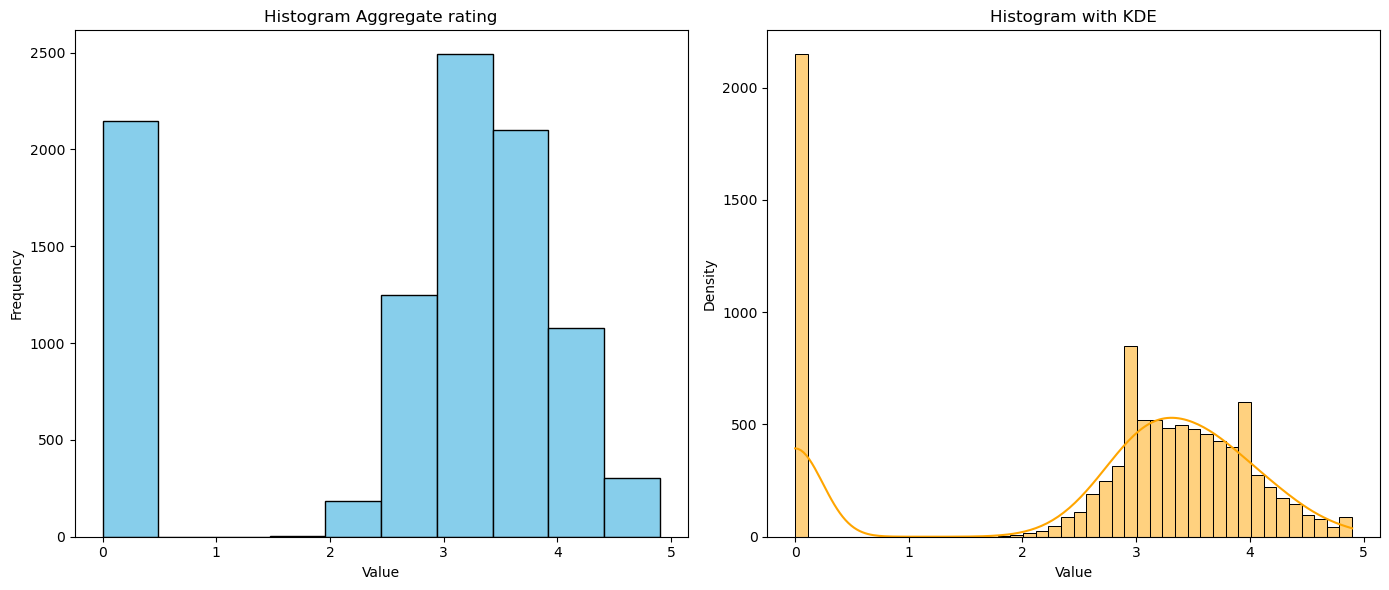

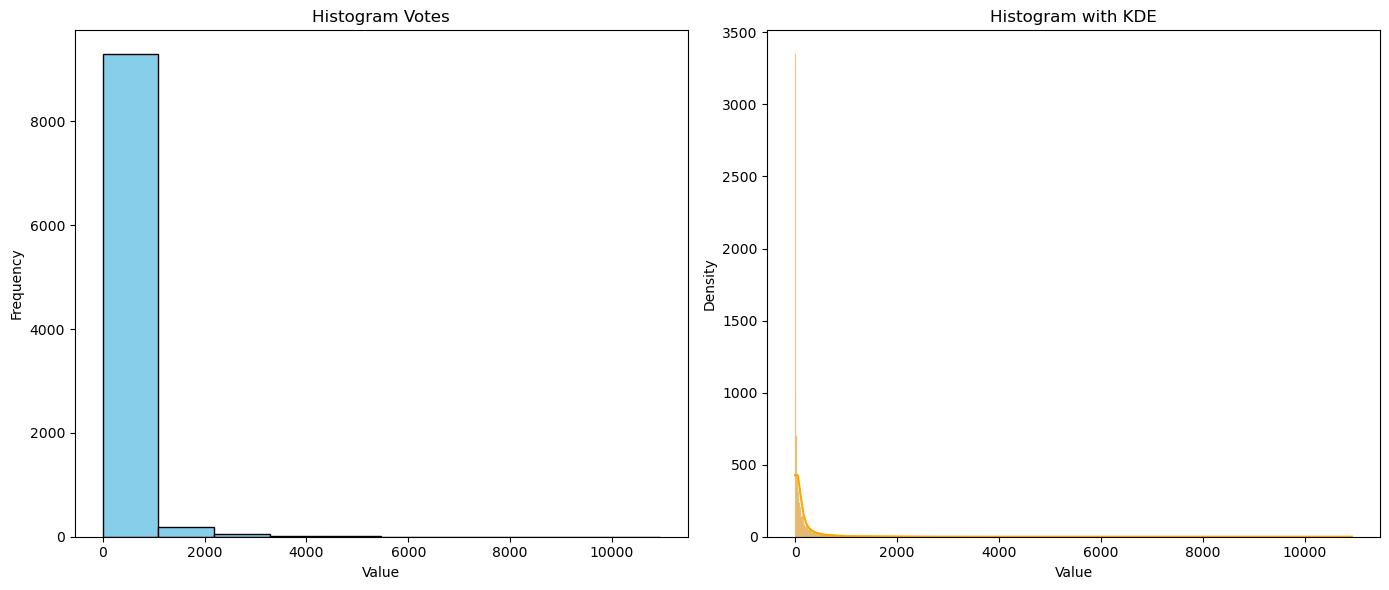

In [14]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(df)

# 8. Numerical - Variables -Outliers Analysis
- IQR Method 
- -3Sigma to +3 Sigma Method

# 9. Bi Variate Analysis

## Cat Vs Cat
 - Crosstab -  Contigency Table
 - Bar Graph with hue


## Cat Vs Num
- Box Plot with hue
- Violin Plot with hue

## Num Vs Num
- Scatter Plot with Hue
- co-relation(co-varaince ,co-relation coffiencnt)
- heatmap

# 10. Data Transformation

### 10.1 left - skewed  to Normal

### 10.2 Right - Skewed  to Normal 

### 10.3 Different distributions to normal distribution

# 11. Standization - Normalization
- Min Max Scaler
- Standard Scaler

# 12. Convert Cat - to - Numerical Columns
- One-Hot-Enconding
- Label Encoding

# 13. Reduce the Number of Columns
- PCA
- tsne

# 14. Inferential statistics test
- chi-square test
- ANOVA Test
- t-test(one and two tail test)
- biserial correlation coefficient